# Introduction to Ambigauss.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import ambigauss 
from ambigauss import gaussian

In [2]:
# Simulate noisy 4-peak spectrum
xdata = np.linspace(0, 10, 500)
ydata = gaussian(xdata, 1, 1, .5) + \
        gaussian(xdata, 2, 5, .3) + \
        gaussian(xdata, 6, 3, .3) + \
        gaussian(xdata, 4, 8, .3) + \
        np.random.randn(len(xdata))*.3 # Add noise

Initialize a model.

In [9]:
fitter = ambigauss.GaussianSpectrum(n_peaks=4)

Pretty print the variables for all peaks.

In [10]:
fitter.parameters.pretty_print()

Name         Value      Min      Max   Stderr     Vary     Expr Brute_Step
amp_0            1     -inf      inf     None     True     None     None
amp_1            1     -inf      inf     None     True     None     None
amp_2            1     -inf      inf     None     True     None     None
amp_3            1     -inf      inf     None     True     None     None
center_0         1     -inf      inf     None     True     None     None
center_1         1     -inf      inf     None     True     None     None
center_2         1     -inf      inf     None     True     None     None
center_3         1     -inf      inf     None     True     None     None
width_0          1     -inf      inf     None     True     None     None
width_1          1     -inf      inf     None     True     None     None
width_2          1     -inf      inf     None     True     None     None
width_3          1     -inf      inf     None     True     None     None


Users can even set guesses for each parameter if they'd like!


In [11]:
model.parameters['center_0'].value = 1
model.parameters['center_1'].value = 3
model.parameters['center_2'].value = 5
model.parameters['center_3'].value = 8

Call the fit method to fit the data.

In [4]:
fitter.fit(xdata, ydata)

GaussianSpectrum(n_peaks=4)

Let's plot the results to see how we did.

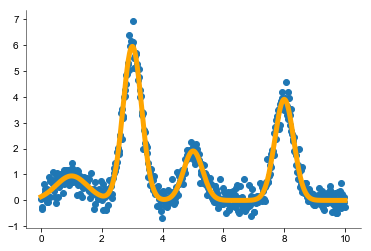

In [14]:
x = xdata
y = fitter.model(x, model.parameters)

plt.scatter(xdata, ydata)
plt.plot(x, y, linewidth=5, color='orange')